<a href="https://colab.research.google.com/github/Josephtelang/stock-target-prediction/blob/main/Stock_Price_Movement_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2024_04_01_Q.zip to 2024_04_01_Q (1).zip


In [ ]:
print(uploaded.keys())

dict_keys([])


In [ ]:
import zipfile
import io
with zipfile.ZipFile('/content/2024_04_01_Q (1).zip' , 'r') as zifref :
  zifref.extractall('/content/Data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/2024_04_01_Q'

In [ ]:
import pandas as pd

In [ ]:
import glob
import os

# folder = "/content/Data"
file_list = glob.glob(os.path.join(folder,"*.asc"))


In [ ]:
file_list

['/content/drive/MyDrive/2024_04_01_Q/ADANIENT_2024_04_01_Q.asc',
 '/content/drive/MyDrive/2024_04_01_Q/ADANIPORTS_2024_04_01_Q.asc',
 '/content/drive/MyDrive/2024_04_01_Q/APOLLOHOSP_2024_04_01_Q.asc',
 '/content/drive/MyDrive/2024_04_01_Q/AXISBANK_2024_04_01_Q.asc',
 '/content/drive/MyDrive/2024_04_01_Q/ASIANPAINT_2024_04_01_Q.asc']

In [ ]:
first = True
for file in file_list:
  chunk = pd.read_csv(file,delimiter= ',')
  chunk.to_csv("/content/combined.csv",mode='a',header=first,index=False)
  first = False


In [ ]:
df = pd.read_csv("/content/combined.csv")
df.head()

,04/01/2024,09:00:00.066,2888,3,Unnamed: 4,0
0,04/01/2024,09:00:00.066,3190.0,1,NaN,0
1,04/01/2024,09:00:00.066,3190.0,1,3220.0,1
2,04/01/2024,09:00:00.341,3197.1,5,3220.0,1
3,04/01/2024,09:00:00.423,3197.1,6,3220.0,1
4,04/01/2024,09:00:00.442,3197.1,7,3220.0,1


In [ ]:
df = pd.read_csv("/content/combined.csv",
                 delimiter='\t',
                 skiprows=1,
                 header=None,
                 names=["Date", "Time", "Price", "Volume", "Value", "TradeCount"]
)

In [ ]:
df.head()

,Date,Time,Price,Volume,Value,TradeCount
0,"04/01/2024,09:00:00.066,3190.0,1,,0",NaN,NaN,NaN,NaN,NaN
1,"04/01/2024,09:00:00.066,3190.0,1,3220.0,1",NaN,NaN,NaN,NaN,NaN
2,"04/01/2024,09:00:00.341,3197.1,5,3220.0,1",NaN,NaN,NaN,NaN,NaN
3,"04/01/2024,09:00:00.423,3197.1,6,3220.0,1",NaN,NaN,NaN,NaN,NaN
4,"04/01/2024,09:00:00.442,3197.1,7,3220.0,1",NaN,NaN,NaN,NaN,NaN


In [ ]:
df_split = df['Date'].str.split(',',expand=True)
df_split.columns = ["Date", "Time", "Price", "Volume", "Value", "TradeCount"]
df_split.head()

,Date,Time,Price,Volume,Value,TradeCount
0,04/01/2024,09:00:00.066,3190.0,1,,0
1,04/01/2024,09:00:00.066,3190.0,1,3220.0,1
2,04/01/2024,09:00:00.341,3197.1,5,3220.0,1
3,04/01/2024,09:00:00.423,3197.1,6,3220.0,1
4,04/01/2024,09:00:00.442,3197.1,7,3220.0,1


In [ ]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416789 entries, 0 to 2416788
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Date        object
 1   Time        object
 2   Price       object
 3   Volume      object
 4   Value       object
 5   TradeCount  object
dtypes: object(6)
memory usage: 110.6+ MB


In [ ]:
(df_split== "").sum()

,0
Date,0
Time,0
Price,0
Volume,0
Value,4
TradeCount,0


In [30]:
df_split.describe()

,Date,Time,Price,Volume,Value,TradeCount
count,2416789,2416789,2416789,2416789,2416789,2416789
unique,1,483350,6690,5551,6649,7607
top,04/01/2024,09:07:26.535,1060.0,1,6460.0,1
freq,2416789,264,6988,164302,10304,137548


In [64]:
import numpy as np

df_split = df_split.replace("",np.nan)
df_cleared = df_split.dropna(subset=['Price','Value']).copy()
df_cleared.isnull().sum()

,0
Date,0
Time,0
Price,0
Volume,0
Value,0
TradeCount,0


In [65]:
for col in ['Price', 'Volume', 'Value', 'TradeCount']:
  df_cleared[col] = pd.to_numeric(df_cleared[col],errors='coerce')

In [66]:
df_cleared.isnull().sum()

,0
Date,0
Time,0
Price,0
Volume,0
Value,1
TradeCount,0


In [67]:
df_cleared = df_cleared.dropna(subset=['Value'])

In [68]:
df_cleared.isnull().sum()

,0
Date,0
Time,0
Price,0
Volume,0
Value,0
TradeCount,0


In [69]:
print(df_cleared['Price'].dtype)

float64


In [70]:
df_cleared

,Date,Time,Price,Volume,Value,TradeCount
1,04/01/2024,09:00:00.066,3190.0,1,3220.0,1
2,04/01/2024,09:00:00.341,3197.1,5,3220.0,1
3,04/01/2024,09:00:00.423,3197.1,6,3220.0,1
4,04/01/2024,09:00:00.442,3197.1,7,3220.0,1
5,04/01/2024,09:00:00.615,3197.1,9,3220.0,1
...,...,...,...,...,...,...
2416784,04/01/2024,15:29:58.745,2870.0,30,2871.0,309
2416785,04/01/2024,15:29:58.842,2870.0,30,2871.0,307
2416786,04/01/2024,15:29:58.955,2870.0,30,2871.0,300
2416787,04/01/2024,15:29:59.717,2870.0,20,2871.0,300


In [71]:
df_cleared.isnull().sum()

,0
Date,0
Time,0
Price,0
Volume,0
Value,0
TradeCount,0


In [72]:
df_cleared['Datetime'] = pd.to_datetime(df_cleared['Date'] +' '+df_cleared['Time'])
df_cleared.set_index('Datetime',inplace=True)
df_cleared.sort_index(inplace=True)

In [228]:
df_agg = df_cleared.resample('1T').agg({'Price':['first','max','min','last'],
                                        'Volume':'sum',
                                        'Value' : 'sum',
                                        'TradeCount' : 'sum'})
df_agg.columns = ['Open','Heigh','Low','Closed','Totalvolume','Totalvalue','Totaltradecount']

<ipython-input-228-a95bdeab9dbc>:1: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



In [76]:
df_agg.head()

,Open,Heigh,Low,Closed,Totalvolume,Totalvalue,Totaltradecount
Datetime,,,,,,,
2024-04-01 09:00:00,1342.05,6992.45,1041.6,1136.00,8534,460334.5,32482
2024-04-01 09:01:00,6992.45,6992.45,1136.0,1476.00,2322,108257.4,20556
2024-04-01 09:02:00,1476.00,6992.45,1476.0,3516.00,928,38549.8,404
2024-04-01 09:03:00,1136.00,6992.45,1136.0,1136.00,260,16355.0,16572
2024-04-01 09:04:00,1136.00,6992.45,1136.0,6992.45,500,20207.2,9582


In [79]:
df_agg['Weight_price'] = df_agg['Totalvalue']/df_agg['Totalvolume']
df_agg['Weight_price'] = df_agg['Weight_price'].replace([np.inf,-np.inf],np.nan)
df_agg['Weight_price'] = df_agg['Weight_price'].fillna(0)

In [80]:
df_agg['Target'] = df_agg['Closed'].shift(-1)/df_agg['Closed']-1

In [82]:
df_agg.isnull().sum()

,0
Open,33
Heigh,33
Low,33
Closed,33
Totalvolume,0
Totalvalue,0
Totaltradecount,0
Weight_price,0
Target,38


In [86]:
df_agg = df_agg.dropna(subset=['Target'])

In [88]:
df_agg.isnull().sum()

,0
Open,0
Heigh,0
Low,0
Closed,0
Totalvolume,0
Totalvalue,0
Totaltradecount,0
Weight_price,0
Target,0


In [89]:
df_agg

,Open,Heigh,Low,Closed,Totalvolume,Totalvalue,Totaltradecount,Weight_price,Target
Datetime,,,,,,,,,
2024-04-01 09:00:00,1342.05,6992.45,1041.60,1136.00,8534,460334.5,32482,53.941235,0.299296
2024-04-01 09:01:00,6992.45,6992.45,1136.00,1476.00,2322,108257.4,20556,46.622481,1.382114
2024-04-01 09:02:00,1476.00,6992.45,1476.00,3516.00,928,38549.8,404,41.540733,-0.676906
2024-04-01 09:03:00,1136.00,6992.45,1136.00,1136.00,260,16355.0,16572,62.903846,5.155326
2024-04-01 09:04:00,1136.00,6992.45,1136.00,6992.45,500,20207.2,9582,40.414400,-0.552174
...,...,...,...,...,...,...,...,...,...
2024-04-01 15:24:00,1052.65,6457.00,1051.45,1051.90,2159692,8971388.4,6655458,4.154013,2.088839
2024-04-01 15:25:00,1051.85,6457.00,1051.40,3249.15,2217314,9282705.3,908250,4.186464,-0.575704
2024-04-01 15:26:00,6457.00,6457.50,1051.60,1378.60,2366252,12797725.4,1067290,5.408437,-0.236037


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

%matplotlib inline

In [91]:
df_agg['Open'].corr(df_agg['Target'])

0.01819047941923596

In [92]:
df_agg.corr(numeric_only=True)['Target'].sort_values(ascending=False)

,Target
Target,1.000000
Totaltradecount,0.081783
Heigh,0.043728
Open,0.018190
Totalvolume,0.002059
Weight_price,-0.005105
Totalvalue,-0.022923
Low,-0.038783
Closed,-0.503679


In [94]:
correlation_matrix = df_agg.corr(numeric_only=True)
correlation_matrix

,Open,Heigh,Low,Closed,Totalvolume,Totalvalue,Totaltradecount,Weight_price,Target
Open,1.000000,0.052547,-0.051673,-0.025239,-0.008917,0.202332,0.153403,0.228590,0.018190
Heigh,0.052547,1.000000,-0.457926,-0.015433,-0.004055,0.022837,0.028792,0.172713,0.043728
Low,-0.051673,-0.457926,1.000000,0.012424,-0.117443,-0.132713,-0.069402,0.104180,-0.038783
Closed,-0.025239,-0.015433,0.012424,1.000000,-0.121490,0.019568,-0.021689,0.075256,-0.503679
Totalvolume,-0.008917,-0.004055,-0.117443,-0.121490,1.000000,0.298861,0.122060,-0.374173,0.002059
Totalvalue,0.202332,0.022837,-0.132713,0.019568,0.298861,1.000000,0.213204,0.454615,-0.022923
Totaltradecount,0.153403,0.028792,-0.069402,-0.021689,0.122060,0.213204,1.000000,0.019987,0.081783
Weight_price,0.228590,0.172713,0.104180,0.075256,-0.374173,0.454615,0.019987,1.000000,-0.005105
Target,0.018190,0.043728,-0.038783,-0.503679,0.002059,-0.022923,0.081783,-0.005105,1.000000


In [95]:
high_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
high_corr

,Open,Heigh,Low,Closed,Totalvolume,Totalvalue,Totaltradecount,Weight_price,Target
Open,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heigh,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Closed,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Totalvolume,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Totalvalue,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Totaltradecount,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Weight_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [103]:
df_agg = df_agg.reset_index()
df_agg

,index,Datetime,Open,Heigh,Low,Closed,Totalvolume,Totalvalue,Totaltradecount,Weight_price,Target
0,0,2024-04-01 09:00:00,1342.05,6992.45,1041.60,1136.00,8534,460334.5,32482,53.941235,0.299296
1,1,2024-04-01 09:01:00,6992.45,6992.45,1136.00,1476.00,2322,108257.4,20556,46.622481,1.382114
2,2,2024-04-01 09:02:00,1476.00,6992.45,1476.00,3516.00,928,38549.8,404,41.540733,-0.676906
3,3,2024-04-01 09:03:00,1136.00,6992.45,1136.00,1136.00,260,16355.0,16572,62.903846,5.155326
4,4,2024-04-01 09:04:00,1136.00,6992.45,1136.00,6992.45,500,20207.2,9582,40.414400,-0.552174
...,...,...,...,...,...,...,...,...,...,...,...
376,376,2024-04-01 15:24:00,1052.65,6457.00,1051.45,1051.90,2159692,8971388.4,6655458,4.154013,2.088839
377,377,2024-04-01 15:25:00,1051.85,6457.00,1051.40,3249.15,2217314,9282705.3,908250,4.186464,-0.575704
378,378,2024-04-01 15:26:00,6457.00,6457.50,1051.60,1378.60,2366252,12797725.4,1067290,5.408437,-0.236037
379,379,2024-04-01 15:27:00,1052.10,6457.30,1052.10,1053.20,1563316,5721389.2,1842032,3.659778,0.000570


In [113]:
fig = px.scatter(df_agg,x='Totaltradecount',y='Target',opacity=0.5,hover_data =['Datetime','Totalvolume','Totalvalue'],title= 'Totaltradecount vs Target',color='Totalvolume')
fig.update_traces(marker_size= 8)
fig.show()

In [110]:
fig = px.scatter(df_agg,x='Closed',y='Target',opacity=0.8,hover_data=['Datetime','Totalvolume','Totalvalue'],title='Closed vs Target' , color='Totalvalue')
fig.update_traces(marker_size = 8)
fig.show()


In [114]:
from sklearn.preprocessing import StandardScaler

In [188]:
x = df_agg[['Closed','Totaltradecount','Heigh']]

scale = StandardScaler()
inputs = scale.fit_transform(x)
inputs

array([[-0.83793383, -0.66906264,  2.80747552],
       [-0.6673993 , -0.67433912,  2.80747552],
       [ 0.35580792, -0.68325507,  2.80747552],
       ...,
       [-0.71625243, -0.21122752, -0.07910859],
       [-0.87946401,  0.13154533, -0.08018779],
       [-0.87916307, -0.32397231, -0.08180659]])

In [189]:
targets = df_agg[['Target']]
targets

,Target
0,0.299296
1,1.382114
2,-0.676906
3,5.155326
4,-0.552174
...,...
376,2.088839
377,-0.575704
378,-0.236037
379,0.000570


In [190]:

print(f'inputs shape : {inputs.shape}')
print(f'targes shape : {targets.shape}')

inputs shape : (381, 3)
targes shape : (381, 1)


In [193]:
xtrain,xtest,ytrain,ytest = train_test_split(inputs,targets,test_size= 0.2,random_state=42)


In [194]:
print(f'xtrain shape : {xtrain.shape}')
print(f'ytrain shape : {xtrain.shape}')
print(f'xtest shape : {xtest.shape}')
print(f'ytest shape : {ytest.shape}')

xtrain shape : (304, 3)
ytrain shape : (304, 3)
xtest shape : (77, 3)
ytest shape : (77, 1)


In [195]:
model = LinearRegression()

In [196]:
model.fit(xtrain,ytrain)

LinearRegression()

In [199]:
predictions = model.predict(xtest)
predictions


array([[-0.8308706 ],
       [ 0.98467683],
       [ 0.99024887],
       [ 1.08250759],
       [ 1.11047629],
       [ 1.03911577],
       [ 1.10447082],
       [ 1.03910245],
       [ 0.42844643],
       [ 0.28878143],
       [ 0.99146686],
       [-0.84405268],
       [ 0.38195827],
       [-0.89228093],
       [ 0.24967433],
       [-0.88172519],
       [ 0.95459956],
       [ 0.29833754],
       [ 0.29867986],
       [ 0.44324964],
       [ 1.21334681],
       [ 0.54296772],
       [ 0.54714606],
       [-0.84426418],
       [-0.83060926],
       [-0.80934266],
       [ 0.6317427 ],
       [ 2.26041065],
       [ 0.54722084],
       [ 0.37500742],
       [-0.87295747],
       [ 0.64456986],
       [ 0.41933922],
       [ 1.12287046],
       [ 1.07912052],
       [ 0.99103643],
       [ 0.97509625],
       [ 0.31149539],
       [ 1.19351809],
       [ 1.12759678],
       [ 1.10376242],
       [-0.9104232 ],
       [-0.86556399],
       [ 1.16115116],
       [ 1.08821965],
       [ 1

In [221]:
ytest

array([-1.54870683e-05,  1.09158578e+00,  1.37657334e+00,  0.00000000e+00,
        2.05436115e+00,  6.98426702e-04,  2.06012733e+00, -2.34250609e-01,
       -6.74415391e-01, -1.38805349e-04,  3.69678897e+00, -5.54803989e-01,
       -6.76315548e-01, -8.36039463e-01,  1.01511802e+00, -8.35618241e-01,
        1.36707103e+00, -5.77325599e-01, -6.75394680e-01,  1.35566021e-01,
        5.14008651e+00, -5.77761773e-01,  1.23108399e+00, -8.36206696e-01,
       -7.86971244e-01, -8.36448381e-01,  2.99295775e-01,  1.35894920e+00,
       -6.33476200e-01,  1.01641209e+00, -5.04533305e-01, -6.45656650e-04,
        1.29655124e-01, -2.37259182e-04,  3.68695968e+00,  3.65163411e-04,
        3.73188353e+00, -6.74198755e-01,  2.87618147e-01, -1.89483657e-04,
        8.04276860e-04, -7.88431013e-01, -5.56317033e-01,  4.26600939e-04,
        3.76780895e+00,  5.14678291e+00, -1.15660831e-01,  1.08218679e+00,
        0.00000000e+00, -8.37195310e-01,  5.11931282e+00,  1.37399205e+00,
        1.36537622e+00, -

In [214]:
mse = np.sqrt(mean_squared_error(ytest,predictions))
mse

1.5384540911679212

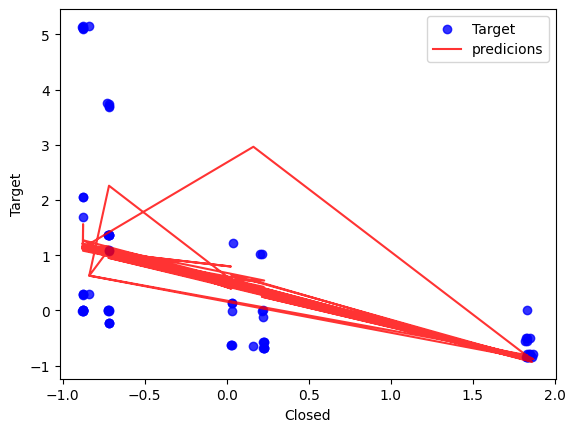

In [222]:
closed = xtest[:,0]

plt.scatter(closed,ytest,alpha=0.8,marker='o',color = 'b')
plt.plot(closed,predictions,alpha=0.8,color = 'r')
plt.xlabel('Closed')
plt.ylabel('Target')
plt.legend(['Target','predicions'])
plt.show()

In [223]:
import seaborn as sns

In [224]:
ytest = ytest.reshape((77,))
predictions = predictions.reshape((77,))

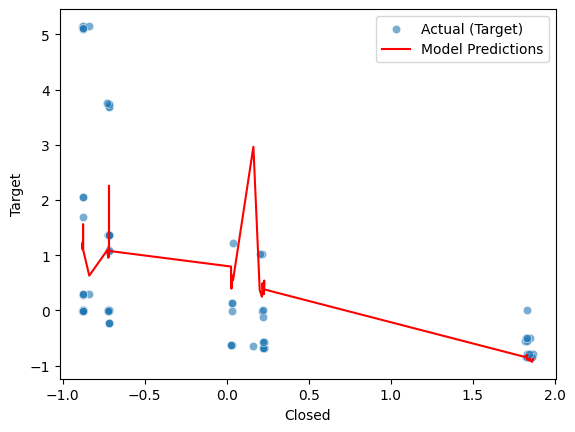

In [225]:
sns.scatterplot(x=closed, y=ytest, alpha=0.6, label='Actual (Target)')
sns.lineplot(x=closed, y=predictions, color='red', label='Model Predictions')

plt.xlabel('Closed')
plt.ylabel('Target')
plt.legend()
plt.show()

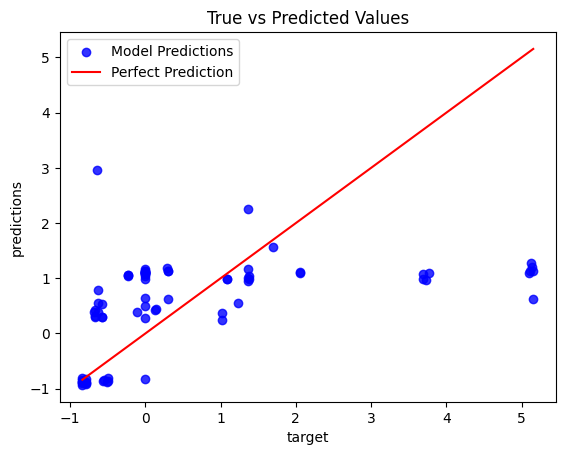

In [226]:
plt.scatter(ytest,predictions,marker='o',alpha=0.8,color='b')
plt.xlabel('target')
plt.ylabel('predictions')
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color='r')
plt.title('True vs Predicted Values', fontsize=12)
plt.legend([ 'Model Predictions','Perfect Prediction'])
plt.show()

In [227]:
print(df_agg['Target'].describe())

count    381.000000
mean       0.543574
std        1.520598
min       -0.837481
25%       -0.526178
50%        0.000000
75%        1.094115
max        5.166391
Name: Target, dtype: float64
